In [1]:
import warnings
warnings.filterwarnings('ignore')

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

# for modelling
import sklearn

In [2]:
# Reading Dataset

In [3]:
data = pd.read_csv('insuranceFraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data['collision_type']

0       Side Collision
1                    ?
2       Rear Collision
3      Front Collision
4                    ?
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                  ?
Name: collision_type, Length: 1000, dtype: object

In [5]:
data.shape

(1000, 39)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [8]:
# lets check the correlation
print(data.corr())

                             months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses   

In [9]:
# lets check the covriance
data.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562


In [10]:
#Data cleaning

In [11]:
#checking for null values
#Replacing '?' with np.nan
data = data.replace('?',np.NaN)
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
# lets fill na values 
#we have missing values for 'collision_type', 'property_damage' and 'police_report_available'


In [13]:
# finding out the most common collision type and replacing missing value of collision type by it
#data['collision_type'].mode()[0]
#we found that most common type of collision type is "Rear Collision"
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

In [14]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [15]:
# It may be the case that there are no responses for property damage then we might take it as No property damage.
data['property_damage'].fillna('NO', inplace = True)

In [16]:
# again, if there are no responses fpr police report available then we might take it as No report available
data['police_report_available'].fillna('NO', inplace = True)

In [17]:
#all null values have been taken care of
data.isnull().any().any()

False

In [18]:
# Data Visualizations

In [19]:
# plotting a scatter plot

fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex')
fig.show()

In [20]:
fig = px.scatter_matrix(data, dimensions=["injury_claim", "property_claim", "vehicle_claim"],
                        color = "insured_sex")
fig.show()

In [21]:
#fig = px.parallel_categories(data, color="total_claim_amount", color_continuous_scale=px.colors.sequential.Inferno)
#fig.show()

In [22]:
fraud = data['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'gold']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

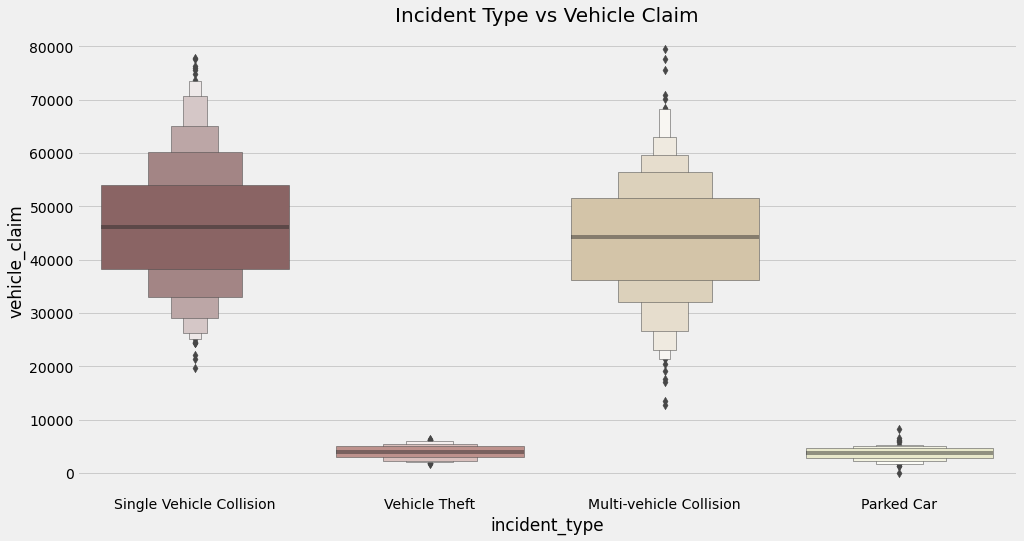

In [23]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data['incident_type'], data['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

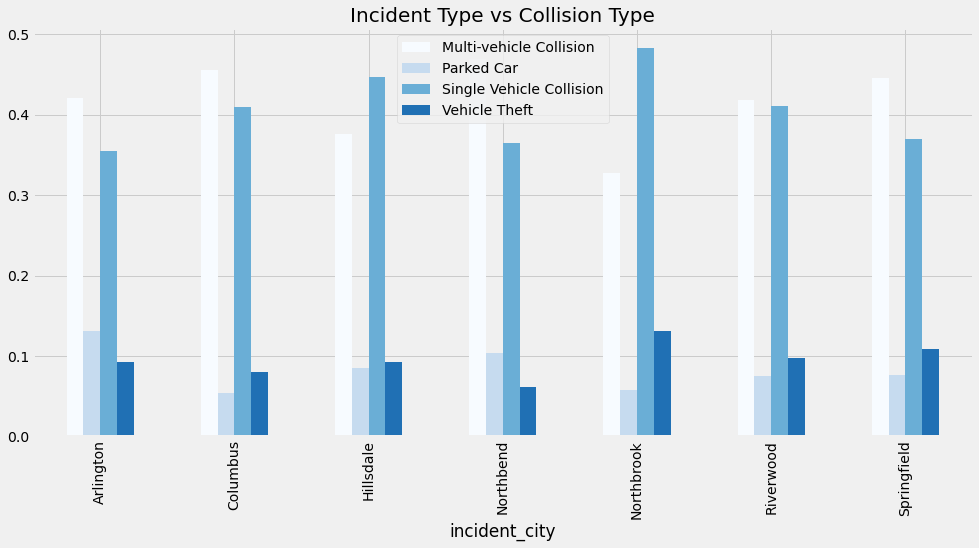

In [24]:
incident = pd.crosstab(data['incident_city'], data['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

In [25]:
# Data Preprocessing

In [26]:
# let's extrat days, month and year from policy bind date

data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [27]:
# let's encode the fraud report to numerical values

data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

# checking the values of fraud reported
data['fraud_reported'].value_counts()

1    753
0    247
Name: fraud_reported, dtype: int64

In [28]:
# let's check the correlation of auto_model with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [29]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

# let's check the values
data['auto_make'].value_counts()

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [30]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [31]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.77,0.76,0.75,0.74,0.73,0.72,0.71,0.69,0.69,0.66))

# let's check the values
# data['auto_make'].value_counts()

In [32]:
# let's check the correlation of police_report_available with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [33]:
# let's perform target encoding for police_report_available

data['police_report_available'] = data['police_report_available'].replace(('NO','YES'),(0.77,0.74))

# let's check the values
# data['police_report_available'].value_counts()

In [34]:
# let's check the correlation of property_damage with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [35]:
# let's perform target encoding for property damage

data['property_damage'] = data['property_damage'].replace(('NO','YES'),(0.76,0.74))

# let's check the values
# data['property_damage'].value_counts()

In [36]:
data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [37]:
data['incident_city'] = data['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.74,0.73,0.71))

# let's check the values
# data['incident_city'].value_counts()

In [38]:
data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)
data['incident_state'] = data['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.77,0.76,0.73,0.70,0.69,0.56))

# checking the values
# data['incident_state'].value_counts()

In [39]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.94,0.79,0.73,0.70,0.68))

# let's check the values
#data['authorities'].value_counts()

In [40]:
data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [41]:
# let's perform target encoding for incident severity

data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

# let's check the values
# data['incident_severity'].value_counts()

In [42]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
1,Rear Collision,0.772340
2,Side Collision,0.746377
0,Front Collision,0.724409


In [43]:
# let's perform target encoding for collision type

data['collision_type'] = data['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.78,0.74,0.72))

# let's check the values of collision type
# data['collision_type'].value_counts()

In [44]:
data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [45]:
# let's perform target encoing for incident type

data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.72,0.70))

# let's check the values
#data['incident_type'].value_counts()

In [46]:
data['incident_date'] = pd.to_datetime(data['incident_date'], errors = 'coerce')

# extracting days and month from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day

In [47]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [48]:
# let's do target encoding for insured relationship

data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

#data['insured-relationship'].value_counts()

In [49]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [50]:
# let's perform target encoding for insured_hobbies

data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

#data['insured_hobbies'].value_counts()

In [51]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [52]:
# let's perform target encoding for insured_occupation

data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.84, 0.84,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))
# data['insured_occupation'].value_counts()

In [53]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [54]:
# let's perform target encoding

data['insured_education_level'] = data['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.78,0.77,0.76,0.74,0.73,0.72,0.71))
#data['insured_education_level'].value_counts()

In [55]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [56]:
# target encoding for sex

data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.73))
#data['insured_sex'].value_counts()

In [57]:
# csl - combined single limit

'''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [58]:
# target encoding for policy_csl

data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.73))

# check the values
# data['policy_csl'].value_counts()

In [59]:
# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [60]:
# target encoding for policy_csl

data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

# check the values
# data['policy_state'].value_counts()

In [61]:
# let's delete unnecassary columns

data = data.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [62]:

# let's split the data into dependent and independent sets

x = data.drop(['fraud_reported'], axis = 1)
y = data['fraud_reported']

print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1000, 35)
Shape of y : (1000,)



u = np.mean(x,axis = 0)
sd = np.std(x,axis = 0)
print(u.shape,sd.shape)
x = (x - u)/sd

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# let's split the dataset into train and test sets



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (800, 35)
Shape of x_test : (200, 35)
Shape of y_train : (800,)
Shape of y_test : (200,)


### Random Forest Classifier

Training Accuracy:  0.9
Testing Accuarcy:  0.83
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        57
           1       0.92      0.83      0.88       143

    accuracy                           0.83       200
   macro avg       0.79      0.83      0.80       200
weighted avg       0.85      0.83      0.83       200



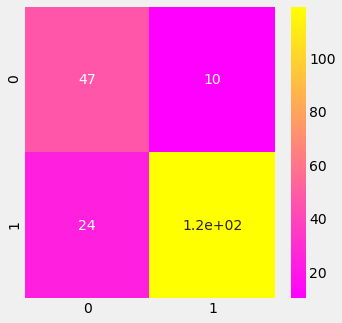

In [65]:
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

## SVC

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler())               ('svc', SVC(gamma='auto'))])


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [67]:
print("Training Accuracy: ", clf.score(x_train, y_train))
print('Testing Accuarcy: ', clf.score(x_test, y_test))

Training Accuracy:  0.95125
Testing Accuarcy:  0.84


In [68]:
## Hyperparameter tuning for SVC using gridsearchCV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.637 total time=   0.0s
[CV 3/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.688 total time=   0.0s
[CV 4/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 5/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.675 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 4/5] END .......C=10, ga

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.650 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.637 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.688 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.762 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.675 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.4s
[CV 1/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [69]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [70]:
grid_predictions = grid.predict(x_test)

In [71]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200



In [74]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel = 'poly'))
clf2.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='poly'))])

In [75]:
clf2_pred = clf2.predict(x_test)

In [80]:
print(clf2.score(x_train,y_train))
print(clf2.score(x_test,y_test))

print(classification_report(y_test, clf2_pred))

0.94625
0.77
              precision    recall  f1-score   support

           0       0.92      0.21      0.34        57
           1       0.76      0.99      0.86       143

    accuracy                           0.77       200
   macro avg       0.84      0.60      0.60       200
weighted avg       0.81      0.77      0.71       200



In [85]:
# degree 5
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel = 'poly',degree = 5))
clf3.fit(x_train, y_train)
clf3_pred = clf3.predict(x_test)
print(classification_report(y_test, clf3_pred))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        57
           1       0.72      1.00      0.84       143

    accuracy                           0.73       200
   macro avg       0.86      0.52      0.45       200
weighted avg       0.80      0.72      0.62       200



## KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier


In [105]:
# Finding optimal k value using elbow method

error_rate = []

for i in range(1,30):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

In [106]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

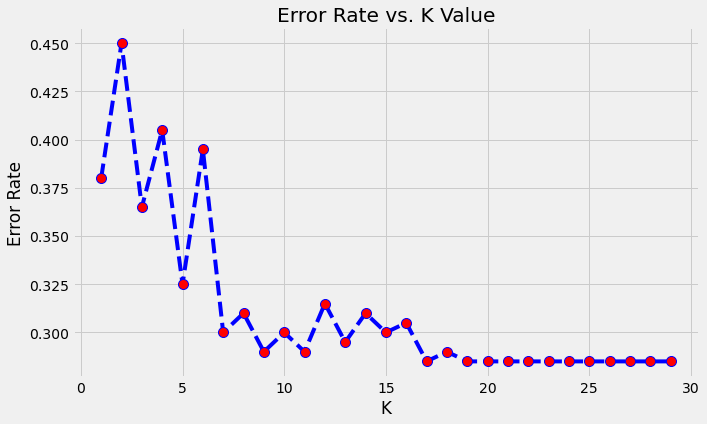

In [107]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [108]:
# best k value is k = 17

In [109]:
knn_final = KNeighborsClassifier(n_neighbors=17)
knn_final.fit(x_train,y_train)
pred = knn_final.predict(x_test)
print(f"Trainig Accuracy:  {knn_final.score(x_train,y_train)}")
print(f"Testing Accuracy:  {knn_final.score(x_test,y_test)}")
print(classification_report(y_test,pred))

Trainig Accuracy:  0.76
Testing Accuracy:  0.715
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.71      1.00      0.83       143

    accuracy                           0.71       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.51      0.71      0.60       200



## Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=1).fit(x_train, y_train)
lr1.score(x_test,y_test)

0.71

## Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy",splitter = "random",random_state=0)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.825

## Hybrid (Stacking Classifier)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

### LR+LinearSVC+RandomForestClassifier+DT

In [209]:
estimators = [
   ('lr', LogisticRegression()),
   ('svr', make_pipeline(StandardScaler(),
                         LinearSVC(random_state=42))),
#    ('knn',KNeighborsClassifier(n_neighbors=17)),
  ('rf',RandomForestClassifier(random_state=45)),
   # ('lr',LogisticRegression())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier(criterion="entropy",splitter = "random",random_state=0)
 )


In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [211]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.816

In [212]:
clf2 = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
 )


In [213]:
clf2.fit(X_train, y_train).score(X_test,y_test)

0.86